<a href="https://colab.research.google.com/github/RESMI-REGHUKUMAR/Machine-Learning-Deep-Learning-Projects/blob/master/facemask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"resmireghukumar","key":"ae277d6828d6e87a2cec4352b9bb68ab"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
# !kaggle datasets download -d wobotintelligence/face-mask-detection-dataset

In [ ]:
# !mkdir facemask1

In [ ]:
# !ls

In [ ]:
# !unzip face-mask-detection-dataset.zip -d facemask1

In [ ]:
!kaggle datasets download -d niharika41298/withwithout-mask

 99% 33.0M/33.5M [00:02<00:00, 9.30MB/s]
100% 33.5M/33.5M [00:02<00:00, 16.2MB/s]


In [ ]:
!mkdir withwithoutmask

In [ ]:
!unzip withwithout-mask.zip -d withwithoutmask

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 321M/330M [00:23<00:00, 10.8MB/s]
100% 330M/330M [00:23<00:00, 14.8MB/s]


In [ ]:
!mkdir facemasks

In [ ]:
!unzip face-mask-12k-images-dataset.zip -d facemasks/

In [ ]:
!ls

face-mask-12k-images-dataset.zip  kaggle.json  withwithoutmask
facemasks			  sample_data  withwithout-mask.zip


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
main_dir = '/content/facemasks/Face Mask Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask = os.path.join(train_dir,'WithMask')
train_nomask = os.path.join(train_dir,'WithoutMask')

valid_mask = os.path.join(valid_dir,'WithMask')
valid_nomask = os.path.join(valid_dir,'WithoutMask')



In [ ]:
train_mask_name = os.listdir(train_mask)
print(train_mask_name[:10])

train_nomask_name = os.listdir(train_nomask)
print(train_nomask_name[:10])


['Augmented_235_9787615.png', '1781.png', 'Augmented_596_2969045.png', 'Augmented_513_1338112.png', 'Augmented_220_9430758.png', 'Augmented_234_344846.png', 'Augmented_119_5587011.png', 'Augmented_836_9191964.png', 'Augmented_281_2202351.png', 'Augmented_554_4278712.png']
['5168.png', '480.png', '1280.png', '4244.png', '5167.png', '3625.png', '1760.png', '2103.png', '157.png', '2631.png']


['/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_235_9787615.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/1781.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_596_2969045.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_513_1338112.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_220_9430758.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_234_344846.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_119_5587011.png', '/content/facemasks/Face Mask Dataset/Train/WithMask/Augmented_836_9191964.png']
['/content/facemasks/Face Mask Dataset/Train/WithoutMask/5168.png', '/content/facemasks/Face Mask Dataset/Train/WithoutMask/480.png', '/content/facemasks/Face Mask Dataset/Train/WithoutMask/1280.png', '/content/facemasks/Face Mask Dataset/Train/WithoutMask/4244.png', '/content/facemasks/Face Mask Dataset/Train/WithoutMask/5167.png', '/content/facemasks/Face Mask Data

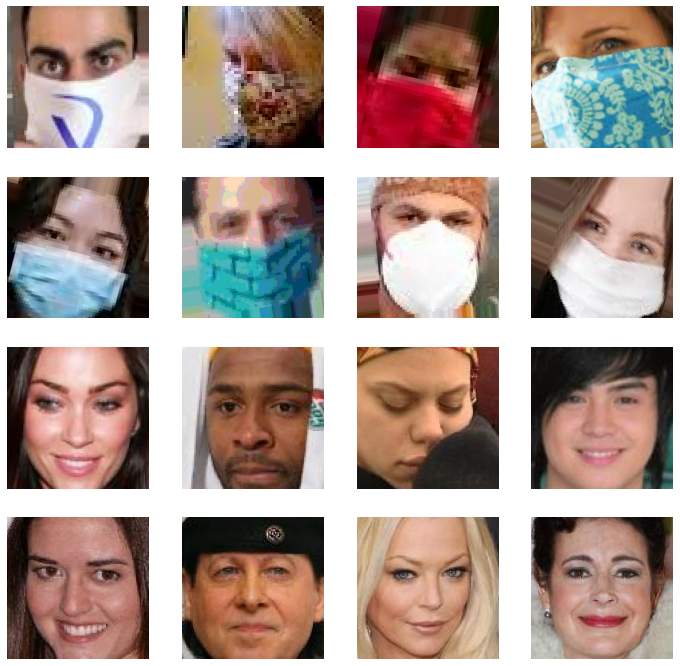

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_name[0:8]:
  mask_pic.append(os.path.join(train_mask,i))

nomask_pic = []
for i in train_nomask_name[0:8]:
  nomask_pic.append(os.path.join(train_nomask,i))

print(mask_pic)
print(nomask_pic)

mrg_pic = mask_pic+nomask_pic

for i in range (0,len(mrg_pic)):
  data = mrg_pic[i].split('/',6)[6]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(mrg_pic[i])
  plt.imshow(image,cmap='gray')

In [ ]:
height = 150
width=150
train_datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.2,shear_range = 0.2,zoom_range=0.2,horizontal_flip=True)
train = train_datagen.flow_from_directory(directory=train_dir,target_size=(height,width),
                                          class_mode="categorical",batch_size=32)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

valid = train_datagen.flow_from_directory(directory=train_dir,target_size=(height,width),
                                          class_mode="categorical",batch_size=32)


Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [ ]:
train.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
train.image_shape

(150, 150, 3)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(150, 150,3))


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in mobilenet.layers:
    layer.trainable = False


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 64002     
Total params: 2,321,986
Trainable params: 64,002
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("mobilenet_facemask.h5",monitor="val_accuracy",save_best_only=True,verbose=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history = model.fit_generator(generator=train,steps_per_epoch=len(train)// 32,validation_data=valid,
                             validation_steps = len(valid)//32,callbacks=[checkpoint,earlystop],epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
9/9 [==============================] - ETA: 0s - loss: 1.8755 - accuracy: 0.8090
Epoch 00001: val_accuracy improved from -inf to 0.94444, saving model to mobilenet_facemask.h5
9/9 [==============================] - 13s 1s/step - loss: 1.8755 - accuracy: 0.8090 - val_loss: 0.3797 - val_accuracy: 0.9444
Epoch 2/15
9/9 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.9618
Epoch 00002: val_accuracy improved from 0.94444 to 0.96875, saving model to mobilenet_facemask.h5
9/9 [==============================] - 12s 1s/step - loss: 0.5758 - accuracy: 0.9618 - val_loss: 0.5845 - val_accuracy: 0.9688
Epoch 3/15
9/9 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9757
Epoch 00003: val_accuracy improved from 0.96875 to 0.97569, saving model to mobilenet_facemask.h5
9/9 [==============================] - 12s 1s/step - loss: 0.1311 - accuracy: 0.9757 - val_loss: 0.2061

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

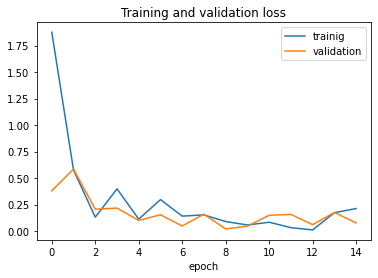

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

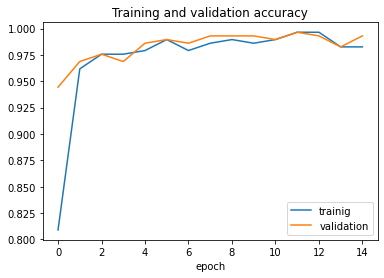

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss,test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

NameError: ignored

In [ ]:
# from google.colab import files
# from keras.preprocessing import image
# uploaded = files.upload()
# for fname in uploaded.keys():
#   img_path = '/content/'+fname
#   img = image.load_img(img_path,target_size=(150,150))
#   images = image.img_to_array(img)
#   images = np.expand_dims(images,axis=0)
#   prediction = model.predict(images)
#   print(fname) 
#   if prediction == 0:
#     print("====mask===")
#   else:
#       print("===no mask===")



Saving 4.webp to 4.webp
4.webp
====mask===


In [ ]:
import cv2

In [ ]:
from google.colab import files
files.upload()

Saving 4.webp to 4.webp


{'4.webp': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

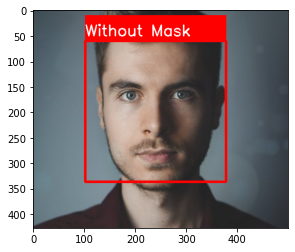

In [ ]:
label = {0:"With Mask",1:"Without Mask"}
color_label = {0: (0,255,0),1 : (0,0,255)}
cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
count = 0
i = "/content/4.webp"

frame =cv2.imread(i)
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    face_image = frame[y:y+h,x:x+w]
    resize_img  = cv2.resize(face_image,(150,150))
    normalized = resize_img/255.0
    reshape = np.reshape(normalized,(1,150,150,3))
    reshape = np.vstack([reshape])
    result = model.predict_classes(reshape)
    
    if result == 0:
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_label[0],3)
        cv2.rectangle(frame,(x,y-50),(x+w,y),color_label[0],-1)
        cv2.putText(frame,label[0],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
    elif result == 1:
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_label[1],3)
        cv2.rectangle(frame,(x,y-50),(x+w,y),color_label[1],-1)
        cv2.putText(frame,label[1],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
    #plt.imshow(frame)
plt.show()
cv2.destroyAllWindows()